# Логистическая регрессия

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Latex
from sklearn.preprocessing import StandardScaler

import sklearn
print(sklearn.__version__)


1.5.1


# Линейная модель

Линейные модели являются одними из самых простых и интуитивно монятных моделей машинного обучения. 

Напомним основы о которых мы с Вами говорили на 1 занятии.

У нас есть множество объектов (признаков) $X$, и каждому из них мы хотим сопоставить какое-то значение $y$. 

К примеру, у нас есть набор операций по банковской карте, а мы хотели бы, понять, какие из этих операций являются мошенническими. Если вы разделите все операции на два класса и нулём обозначите законные действия, а единицей мошеннические, то у вас получится простейшая задача классификации. 

Представьте другую ситуацию: у вас есть данные о годе выпуска, технических характеристиках и марках автомобилей, по которым мы хотели бы оценить стоимость этих автомобилей на вторичном рынке. Это пример задачи регрессии.

Таким образом, задачи классификации и регрессии можно сформулировать как поиск отображения из множества объектов $X$ в множество возможных $y$.

Математически задачи можно описать так:
- для  классификации $X\rightarrow \{0,1,..., c\}$ где $0,...,c$ - номера классов;
- для регрессии $X\rightarrow \mathbb{R}$, где $\mathbb{R}$ - вещественное число.


Пусть у нас задан датасет $(X,y)$ где: 
- $y = (y_i)_{i=1}^m \in \mathbb{R}^m$ – вектор значений целевой переменной; 
- $ X=(x_i)_{i=1}^m \in \mathbb{R}^{m\times n}$, $x_i$ это $i$-я строка признаков, при этом вектор имеет размер $n$, то есть в датасете $n$ признаков (фич). 

Мы хотим моделировать зависимость $y_i$ от $x_i$ как линейную функцию со свободным членом. Общий вид такой функции из $\mathbb{R}^m$  в $\mathbb{R}$ 

Вся данная лекция будет посвящена самому простому такому семейству — линейным функциям вида

$$ y_i = f_w(x_i) = w_1 x_{i,1} + ... + w_n x_{i,n} + w_0, $$

а в обобщенном виде на все строки:

$$ y = f_w(X) = w_1 x_1 + ... + w_n x_n + w_0, $$

где $y$ или $f_w(X)$ – целевая переменная (target), $(x_1,...,x_n)$ – вектор, соответствующий объекту выборки (вектор признаков, мы их также называем фичами от английского features), а $w_1, ... ,w_n, w_0$  – параметры модели. 

Необходимо отметить, что таким образом в нашем датасете всего $n$ - **столбцов** с данными, то есть, $(x_1,...,x_n)$ это вектор состоящий из векторов, например $x_1= (x_{0,1},...,x_{i,1}, ...,x_{i,m})$, где $i$ отвечает за выбор i **строки** с данными из нашего датасета из $m$ строк. 

**Важно понимать**, что вектор $w = (w_1, ... ,w_n, w_0)$ един для всех строк нашей модели, он расчитавается для всех наших данных, а не пересчитывается для каждой строки.

Вектор $w = (w_1,...,w_n)$ часто называю (особенно в эконометрике) вектором весов, а число $w_0$ – свободным коэффициентом, или сдвигом (bias). В эконометрике свободный коэффициент часто обозначают $\varepsilon$.
 
Более компактно линейную модель можно записать в виде:
 
 $$ f_w(X) = w\cdot X  + w_0\;,$$
 
где $w\cdot X$ скалярное произведение двух векторов.
  
 $$ \left(x_{1} ... x_{n}\right)\left( \begin{array}{c} w_{1}\\... \\ w_{n} \end{array}\right)+w_0 = 
 \left(1, x_{1} ... x_{n}\right)\left( \begin{array}{c}  w_{0}\\w_{1}\\... \\ w_{n} \end{array}\right)
 $$
 
Поскольку это сильно упрощает запись, в дальнейшем мы будем считать, что это уже сделано и зависимость имеет вид просто: $$f_w(x_i)=w\cdot x_i.$$


Теперь, когда мы выбрали семейство функций, в котором будем искать решение, задача стала существенно проще. Мы теперь ищем не какое-то абстрактное отображение, а конкретный вектор $(w_0,w_1,...,w_n)\in \mathbb R_{m+1}$.

Чтобы применять линейную модель, нужно, чтобы каждый объект уже был представлен вектором численных признаков. Конечно, просто текст или граф в линейную модель не положить, придётся сначала придумать для него численные фичи. 

**Важно!** Модель называют линейной, если она является линейной комбинацией по этим численным признакам (фичам), то есть линейна в смысле нахождения весов $w$.

**Следствие.** Линейные зависимости не так просты, как кажется. Пусть мы решаем задачу регрессии. Если мы подозреваем, что целевая переменная $y$ не выражается через $x_1$, $x_2$ как линейная функция, а зависит ещё от логарифма $x_1$ и ещё как-нибудь от того, разные ли знаки у признаков, то мы можем ввести дополнительные признаки к уже существующим, просто объявим новые "комбинации" новыми признаками (фичами), и добавив перед ними соответствующие регрессионные коэффициенты:

$$ y =  w_1 x_1 + w_2x_2+w_3\log x_1+ w_4 \;\text{sgn}\; (x_1 x_2) + w_0 $$

и в итоге из двумерной нелинейной задачи мы получили четырёхмерную линейную регрессию - линейную в смысле весов $w_i$.

Помимо простоты, у линейных моделей есть несколько других достоинств. К примеру, мы можем достаточно легко судить, как влияют на результат те или иные признаки. Скажем, если вес $w_j$
положителен, то с ростом $j$-го признака таргет в случае регрессии будет увеличиваться, а в случае классификации наш выбор будет сдвигаться в пользу одного из классов. 

Значение весов тоже имеет прозрачную интерпретацию: чем вес $w_j$ больше, тем «важнее» $j$-й признак для итогового предсказания. То есть, если вы построили линейную модель, вы неплохо можете объяснить заказчику те или иные её результаты. 

Это качество моделей называют **интерпретируемостью**. Оно особенно ценится causal inference моделях (моделях причинно-следственных связей). В данных моделях важно понимать, как модель принимает те или иные решения и какими принципами руководствуется. При этом, не все методы машинного обучения хорошо интерпретируемы, к примеру, поведение искусственных нейронных сетей, случайных лесов или градиентного бустинга интерпретировать довольно сложно (без понимания концепции векторов Шепли). Кстати говоря causal inference модели - это эконометрика ;)

В то же время слепо доверять весам линейных моделей тоже не стоит по целому ряду причин:
1. Линейные модели всё-таки довольно узкий класс функций, они неплохо работают для небольших датасетов и простых задач. Однако, если вы решаете линейной моделью более сложную задачу, то вам, скорее всего, придётся выдумывать дополнительные признаки, являющиеся сложными функциями от исходных. Поиск таких дополнительных признаков называется feature engineering. Вот только поиском таких искусственных фичей можно сильно увлечься, так что осмысленность интерпретации будет сильно зависеть от здравого смысла эксперта, строившего модель.

2. Если между признаками есть приближённая линейная зависимость, коэффициенты в линейной модели могут совершенно потерять физический смысл (об этой проблеме и о том, как с ней бороться, мы поговорим дальше, когда будем обсуждать мультиколлинеарность и регуляризацию).

3. Особенно осторожно стоит верить в утверждения вида «этот коэффициент маленький, значит, этот признак не важен». Во-первых, всё зависит от масштаба признака: вдруг коэффициент мал, чтобы скомпенсировать его. Во-вторых, зависимость действительно может быть слабой, но кто знает, в какой ситуации она окажется важна. 

4. Конкретные значения весов могут меняться в зависимости от обучающей выборки, хотя с ростом её размера они будут потихоньку сходиться к весам «наилучшей» линейной модели, которую можно было бы построить по всем-всем-всем данным на свете.

### Сведение к задаче оптимизации

Мы хотим, чтобы на нашем датасете (то есть на парах $(x_i,y_i)$ из обучающей выборки) функция $f_w$ как можно лучше приближала нашу зависимость. При этом всегда стоит помнить, что выбросы в данных или аномалии (ошибки) могут значительноповлиять на итоговый результат. 

![lin](Pict/linear1.png)

Для того, чтобы чётко сформулировать задачу, нам осталось только одно: на математическом языке выразить желание «приблизить $f_w(x)$ к $y$». Говоря простым языком, мы должны научиться измерять качество модели и минимизировать её ошибку, как-то меняя обучаемые параметры. 

В нашем примере обучаемые параметры — это веса $w$. Функция, оценивающая то, как часто модель ошибается, традиционно называется функцией потерь, функционалом качества или просто лоссом (loss function). Важно, чтобы её было легко оптимизировать: при этом, гладкая функция потерь – это хорошо, а кусочно постоянная – просто ужасно (так как гладкая имеет производную и становиться достаточно просто искать локальные и глобальные минимумы).

По терминалогии: под функционалом понимаем отображение любого множества в еклидово кольцо, так как нам необходимо понятие сравнимости для результатов отображения, то есть понимание какой результат больще или меньше.

Функции потерь бывают разными. От их выбора зависит то, насколько задачу в дальнейшем легко решать, и то, в каком смысле у нас получится приблизить предсказание модели к целевым значениям. Интуитивно понятно, что для нашей текущей задачи нам нужно взять вектор $y$  и вектор предсказаний модели и как-то сравнить, насколько они похожи. 

Так как эти вектора «живут» в одном векторном пространстве, расстояние между ними вполне может быть функцией потерь. Более того, положительная непрерывная функция от этого расстояния тоже подойдёт в качестве функции потерь. При этом способов задать расстояние между векторами тоже довольно много и мы о них уже говорили. 

Давайте возьмём в качестве функционала качества (loss function)  квадрат $L^2$-нормы вектора разницы предсказаний модели и $y$, это фактически евклидово расстояние. 

Во-первых, как окажется, так задачу будет нетрудно решить, а во-вторых, у этого лосса есть ещё несколько дополнительных свойств:

- $L_2$-норма разницы – это евклидово расстояние $‖y−f_w(X)‖_2 =\sqrt{  (y−f_w(X))\cdot (y−f_w(X)) } $  между вектором таргетов и вектором ответов модели, то есть мы их приближаем в смысле самого простого и понятного «расстояния» (чем меньше, тем лучше).

- С точки зрения теории вероятности и мат. стата это соответствует гипотезе о том, что наши данные состоят из линейного «сигнала» и нормально распределенного «шума» (вспоминаем эконометрику - $\varepsilon$).

Так вот, наша функция потерь выглядит так ($L$ это функция потерь, а $L_2$ это эвклидова норма, увы у нас слишком мало букв и так исторически сложилось ... от этого часто возникает путаница в головах):

$$
L(f,X,y) = ‖y−f_w(X)‖_2^2 = ‖y − w\cdot X)‖_2^2 = \sum_{i=1}^m(y_i - w\cdot x_i)^2
$$

Такой функционал ошибки не очень хорош для сравнения поведения моделей на выборках разного размера. Представьте, что вы хотите понять, насколько качество модели на тестовой выборке из 2500 объектов хуже, чем на тренировочной из 5000 объектов. Вы измерили $L_2$-норму ошибки и получили в одном случае 300, а в другом 500. Эти числа не очень интерпретируемы. Гораздо лучше посмотреть на среднеквадратичное отклонение:

$$
L(f,X,y) = \frac{1}{m} \sum_{i=1}^m(y_i - w\cdot x_i)^2
$$

По этой метрике на тестовой выборке получаем 0.12, а на тренировочной 0.1.

Функция потерь $\frac{1}{m}\sum_{i=1}^m (y_i−w\cdot x_i)^2$ называется Mean Squared Error, MSE или среднеквадратическим отклонением. Разница разница MSE и $L_2$-нормой чисто косметическая, на алгоритм решения задачи она не влияет:
$$
MSE(f,X,y)=\frac{1}{m}‖y−w\cdot X‖^2_2
$$

В самом широком смысле, функции работают с объектами множеств: берут какой-то входящий объект из одного множества и выдают на выходе соответствующий ему объект из другого. 

Если мы имеем дело с отображением, которое на вход принимает функции, а на выходе выдаёт число, то такое отображение называют функционалом. Если вы посмотрите на нашу функцию потерь, то увидите, что это именно функционал. 

Для каждой конкретной линейной функции, которую задают веса $w$, мы получаем число, которое оценивает, насколько точно эта функция приближает наши значения $y$. 

Чем меньше это число, тем точнее наше решение, значит для того, чтобы найти лучшую модель, этот функционал нам надо минимизировать по $w$:
$$ ‖y−w\cdot X‖^2_2 \rightarrow \min_w$$
Эту задачу можно решать разными способами:
- МНК: точный аналитический метод;
- МНК: приближенный численный метод (градиентный спуск).

### Аналитический метод (вспоминаем алгебру)


В иделе наша цель выглядит как решение матричного уравнения по поиску $w$ (обратите внимание мы тут поменяли местами $X$ и $w$, так как $X$ - матрица (это именно матрица, а не вектор состоящий из векторов), $w$ и $y$ - ветрора **в виде матрицы столбца**):
$$ X w = y$$
если бы матрица $X$ была квадратной и невырожденной (число уравнений равно числу неизвестных и все уравнения линейно независимы), то решение задавалось бы формулой

$$ w = X^{-1}y$$

Но увы в реальной жизни так не бывает. Количество строк данных у нас всегда больше числа фич, правда (крайне редко) иногда наобород, но так чтобы равно... такого лично у меня не бывало.

Тогда если матрица $X$ прямоугольна, то мы можем найти псевдорешение, возможно оно будет единственное (вопрос на подумать - когда?), а возможно одно из бесконечно многих (вопрос на подумать - когда?). Для этого мы домножим на транспонированную матрицу, таким образом получим квадратную матрицу, которую уже можно попробовать обратить.
$$ X^T X w = X^T y$$
$$ (X^T X)^{-1}X^T X w = (X^T X)^{-1} X^T y$$
$$ I w = (X^T X)^{-1} X^T y$$
$$ w = (X^T X)^{-1} X^T y$$

матрица $(X^T X)^{-1} X^T$ называется псевдообращением матрицы $X$, а $w$ – псевдорешением


Ну а теперь запишим все корректно через минимизацию лосса:

$$ ‖y−Xw‖^2_2 \rightarrow \min_w$$

Взяв производную по $w$ и приравняв ее к нулю, получаем (привет дифференцированию матриц):

Выборочные правила (напоминание, подробно тут [как дифференцируются матрицы](http://www.machinelearning.ru/wiki/images/5/50/MOMO17_Seminar2.pdf)):
$$\frac{\partial }{\partial x} x^T a = a$$
$$\frac{\partial }{\partial x} x^T A x = (A+A^T)x$$
$$\frac{\partial }{\partial A} x^T A y = x y^T$$
$$\frac{\partial }{\partial x} A^{-1} = -A^{-1}\frac{\partial A}{\partial x} A^{-1}$$

Итак (добавил стрелочку для наглядности **с векторами в виде матрицы столбца**):

$$\frac{\partial ‖\vec{y}−X\vec{w}‖^2_2}{\partial \vec{w}} = \frac{\partial (\vec{y}−X\vec{w})^T(\vec{y}−X\vec{w})}{\partial \vec{w}}= $$
$$= 
\frac{\partial}{\partial w} \left (
\vec{y}^T\vec{y} - 2\vec{y}^T X \vec{w} + \vec{w}^TX^TX\vec{w}\right) = 
 - 2\vec{y}^T X+2X^TX\vec{w}
$$

теперь:
$$ - 2\vec{y}^T X+2X^TX\vec{w} = 0 $$
$$ X^TX\vec{w} = \vec{y}^T X $$
$$ X^TX\vec{w} =  X^T\vec{y} $$
$$ \vec{w} =  (X^TX)^{-1}X^T\vec{y} $$

**Важно замечание.** Может ли быть матрица $X^T X$ вырожденной матрицей? Такое может быть если ее столбцы (строки) линейно зависимы. Строки это просто - не должно быть одинаковых строк. Столбцы скорее всего нет, так как зачастую признаки могут быть приближённо линейно зависимы, особенно если их много. Тогда матрица $X^T X$
 будет близка к вырожденной, и это, как мы дальше увидим, будет вести к разным, в том числе вычислительным проблемам.
 
**Проблемы аналитического решения.** вычислительная сложность $n^2m+n^3$ (сложность перемножение $n^2m$, обращение $n^3$) это долго вычислять при большом количестве строк и признаков ...

### Приближенный численный метод

Минимизируемый функционал является гладким и выпуклым, а это значит, что можно эффективно искать точку его минимума с помощью итеративных градиентных методов.

Как известно, градиент функции в точке направлен в сторону её наискорейшего роста, а антиградиент (противоположный градиенту вектор) в сторону наискорейшего убывания. То есть имея какое-то приближение оптимального значения параметра $w$, мы можем его улучшить, посчитав градиент функции потерь в точке и немного сдвинув вектор весов в направлении антиградиента:
$$
w_j \rightarrow w_j − \alpha \frac{d}{dw_j}L(f_w,X,y)
$$
где $\alpha$ – это параметр алгоритма («темп обучения»), который контролирует величину шага в направлении антиградиента. Описанный алгоритм называется градиентным спуском.

Посмотрим, как будет выглядеть градиентный спуск для функции потерь
$$L(f_w,X,y)=\frac{1}{m}||y-Xw||^2$$

Градиент квадрата евклидовой нормы: 

$$ \nabla_w L = \frac{2}{m} X^T (y-Xw) $$
 
Следовательно, стартовав из какого-то начального приближения, мы можем итеративно уменьшать значение функции, пока не сойдёмся (по крайней мере в теории) к минимуму (вообще говоря, локальному, но в данном случае глобальному).

**Сложность.** вычислительная сложность  $m n s$, где $s$ - максимальное число итераций.

 Градиентный спуск может вычисляться полностью (с расчетом градиента по всем направлениям) или по случайно отобраным направлениям (частично), так называемый стохастический градиентный спуск.

## Регуляризация

Всегда ли решение задачи регрессии единственно? Вообще говоря, нет. Так, если в выборке два признака будут линейно зависимы (и следовательно, ранг матрицы будет меньше $n$ (у нас обычно фич - $n$ меньше строк с данными  -$m$), то гарантировано найдётся такой вектор весов $\gamma$ что $\gamma \cdot x_i =0 \;\; \forall x_i$. 

В этом случае, если какой-то $w$ является решением оптимизационной задачи, то и $w+\alpha\gamma$ тоже является решением для любого $\alpha$. 

То есть решение не только не обязано быть уникальным, так ещё может быть сколь угодно большим по абсалютному значению. Это создаёт вычислительные трудности. 

Малые погрешности признаков сильно возрастают при предсказании ответа, а в градиентном спуске накапливается погрешность из-за операций со слишком большими числами.

Конечно, в жизни редко бывает так, что признаки строго линейно зависимы, а вот быть приближённо линейно зависимыми они вполне могут быть. Такая ситуация в машинном обучении называется **мультиколлинеарностью**. В этом случае у нас, всё равно, возникают проблемы, близкие к описанным выше. 

Важно ещё отметить, что в случае, когда несколько признаков линейно зависимы, веса $w_i$ при них теряют физический смысл. Может даже оказаться, что вес признака, с ростом которого таргет, казалось бы, должен увеличиваться, станет отрицательным. Это делает модель не только неточной, но и принципиально не интерпретируемой. Вообще, неадекватность знаков или величины весов – хорошее указание на мультиколлинеарность.






Давайте посмотрим что происходит с нашей матрицей $(X^T X)^{-1}$ при наличии мультиколлинеарности:
$$det(X^T X)\rightarrow 0,$$ 
аналогичная ситуация с алгебраическими дополнениями. В результате получаем либо деление на 0, либо неопределенности 0/0. В результате огроные проблемы вычисления обратной матрицы, при которых ряд весов может стать очень большим, а следовательно при небольших раздичиях в признаке, результат может значительно меняться (получаются значительно отличающиеся ответы), что выглядит несколько странно.

Как решить эту проблему? Можно решить путем регуляризации матрицы следующим образом:
$$(X^T X +\lambda I)^{-1}$$
Прибавление диагональной матрицы к вырожденной матрице получается гарантированно регулярная (невырожденная квадратная) матрица. Такое решение уменьшает дисперсию, но становится смещенным, т.к. минимизируется также и норма вектора параметров, что заставляет решение сдвигаться в сторону нуля. Чуть ниже мы это докажем для разной регуляризации.


Таким образом, вместо исходной задачи мы будем решать следущую задачу:

$$\min_w L(fw,X,y)= \min_w (‖y-Xw‖^2_2+\lambda‖w‖^*_*)$$

где $\lambda$ - коэффициентом регуляризации, $‖w‖^*_*$ - регуляризатор, один из двух вариантов:
- $‖w‖^2_2 = w_1^2+...+w_k^2$ регуляризация $L_2$;
- $‖w‖^1_1 =  |w_1|+...+|w_k|$  регуляризация $L_1$;

Тогда наш лосс **для регуляризация $L_2$** (для внимательных я теряю часто нормировочный коэфициент $1/m$, чтобы не усложнять выводы):
$$L(f_w,X,y) = ‖Xw−y‖^2_2+\lambda‖w‖^2_2 = (\vec{y}−X\vec{w})^T(\vec{y}−Xw)+ \lambda \vec{w}^T\vec{w}$$

Вычислим производную:
$$\frac{\partial}{\partial w}L(f_w,X,y)= 
\frac{\partial}{\partial w} \left (
\vec{y}^T\vec{y} - 2\vec{y}^T X \vec{w} + \vec{w}^TX^TX\vec{w}+\lambda \vec{w}^T\vec{w}\right) = 
 - 2\vec{y}^T X+2X^TX\vec{w}+2\lambda \vec{w}
$$

Найдем решение:
$$\frac{\partial}{\partial w}L(f_w,X,y)=0$$
$$ -\vec{y}^T X + X^TX\vec{w} + \lambda \vec{w} = 0$$
$$(X^TX\vec{w} + \lambda I)\vec{w} = \vec{y}^T X$$
$$\vec{w} = (X^TX\vec{w} + \lambda I)^{-1}\vec{y}^T X$$

Таким образом увеличивая параметр $\lambda$ мы за счет изменения значений собственных векторов уменьшаем число обусловленности матрицы. Число обусловленности матрицы — это отношение абсалютного значения максимального собственного числа матрицы к абсалютнму значению  минимального собственного числа. Большое число обусловленности матрицы, или же наличие одного или нескольких собственных чисел близких к нулю свидетельствует о наличии мультиколлинеарности (или нечеткой мультиколлиниарности). То есть ($e$ - собственные числа)
$$\frac{e_\max + \lambda}{e_\min + \lambda}$$
обусловленность улучшается, а следовательно разброс коэффициентов тоже уменьшается.

Быстренько запишем лосс **для регуляризация $L_1$** :) :
$$L(f_w,X,y) = ‖Xw−y‖^2_2+\lambda‖w‖^1_1 = (\vec{y}−X\vec{w})^T(\vec{y}−Xw)+ \lambda |\vec{w}|$$

Вычислим производную:
$$\frac{\partial}{\partial w}L(f_w,X,y)= \frac{\partial}{\partial w}\left( (\vec{y}−X\vec{w})^T(\vec{y}−Xw)+ \lambda \;\text{sign}(\vec{w})\right)
$$

К сожалению, такая задача не имеет решения в явном виде. Для поиска хорошего приближенного решения мы можем пользоваться методом градиентного спуска.



### Подбор коэффициента

Коэффициент$\lambda$ является гиперпараметром модели и **достаточно сильно влияет** на качество итогового решения. Его подбирают **по логарифмической шкале** (скажем, от 0.01 до 100), используя для сравнения моделей с разными значениями $\lambda$ поверочные выборки. При этом качество модели с подобранным коэффициентом регуляризации уже проверяют на тестовой выборке, чтобы исключить переобучение. 

### Влияние регуляризации на веса (уменьшение количества признаков)

При $L_2$-регуляризации одинаковые значения лежат на окружности ($n$-мерной сфере), при $L_1$ – на ромбе, при $L_1+L_2$ – «выгнутом» ромбе. У ромба большая вероятность коснуться линии уровня вершиной, чем у круга (имеется ввиду пересечения линий координат с окружностью), а это соответсвует тому, что в оптимальном решении есть нулевой вес и следовательно мы отбрасывам эту фичу. 
Поэтому нулевой вес практически всегда встречается в $L_1$ регуляризации и практически никогда в остальных случаях.

![lin2](Pict/lin_l1_l2.png)


## Важные комментарии.
**ВНИМАНИЕ!** Важно понимать, что регуляризация никак не борется с выбросами! Более того регуляризия приводит **к отклонению результатов в сторону выбросов**! Напишите код и проверьте это утверждение, будет полезно.  

Если нужна устойчивая к выбросом линейная регрессия есть метод  RANdom SAmple Consensus (RANSAC) в [scikit-learn](https://scikit-learn.org/stable/modules/linear_model.html#ransac-regression). 

Метод работает следующим образом:
1. Выбрать случайное количество строк `min_samples` из исходных данных.
2. Обучить модель на данном подмножестве строк и проверить ее качество.
3. Найти все точки, которые хорошо предсказываются моделью. Абсолютная ошибка между предсказанием и истиной не более заданного `residual_threshold` и пополнить такими строками исходное множество строк.
4. Повторять 2-3 до тех пор пока не будет найдено максимальное количество строк (или достигнуты иные критерии останова).
Кстати говоря, данный метод можно использовать для любого регрессора, но чаще применяется в линейных регрессиях.

Изучаем самостоятельно (есть еще и другие способы [не регрессировать на выбросы ...](https://scikit-learn.org/stable/auto_examples/linear_model/plot_robust_fit.html#sphx-glr-auto-examples-linear-model-plot-robust-fit-py)). 

## Приведем пример для бостонских домов

Внимание! Пример приведен только для расчета коэффициентов и наблюдение эффектарегуляризации. Реальные модели строить так нельзя!

Основные алгоритмы применяемые в линейных регрессиях:

1. [`Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge) -  $L_2$ регуляризация.
2. [`Lasso`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso) -  $L_1$ регуляризаци.
3. [`ElasticNet`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) - $L_1$ и $L_2$ регуляризация (обычно, сложнее в настройке при незначительном эффекте).
4. [`Lars`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lars) - [метод наименьших углов для отбора значимых весов](http://www.machinelearning.ru/wiki/index.php?title=LARS). Интересный факт: Lasso является частым случаем Lars. Кстати, есть довольно интересное свойство: он может эффективно работать на выборках, в которых число признаков больше числа примеров.
5. [`OrthogonalMatchingPursuit`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.OrthogonalMatchingPursuit.html) - модель используется для получения регрессий на разреженных данных и удаления шума(https://en.wikipedia.org/wiki/Matching_pursuit)
6. [`SGDRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) - линейная модель подобрана путем минимизации регуляризованных эмпирических потерь с помощью стохастического градиентного спуска.


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
from sklearn.datasets import load_iris

from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import RobustScaler, Normalizer

from sklearn.model_selection import train_test_split, cross_val_score  
from sklearn.model_selection import GridSearchCV, KFold, StratifiedShuffleSplit

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.linear_model import  Lars, OrthogonalMatchingPursuit, SGDRegressor

from sklearn.metrics import classification_report

import sklearn
print(sklearn.__version__)

1.5.1


### Датасет бостонские дома 

CRIM – уровень преступности\
ZN – доля земель под жилую застройку\
INDUS – доля акров, не связанных с розничной торговлей в расчете на город\
CHAS – 1, если граничит с рекой\
NOX – концентрация оксида азота\
RM – среднее количество комнат на доме\
AGE – доля жилых домов, построенных до 1940 года\
DIS – взвешенные расстояния до пяти бостонских центров занятости\
RAD – индекс доступности магистралей\
TAX – полная ставка налога на имущество\
PTRATIO – соотношение учеников и учителей по городам\
B – доля лиц афроамериканского происхождения\
LSTAT – процент населения с более низким статусом\
MEDV – медианная стоимость домов (в тыс. долларов)\

[Исходный файл](http://lib.stat.cmu.edu/datasets/boston)

Можно использовать датасет sklearn.datasets.load_boston пока он там есть :)

Задача спрогнозироать цену MEDV.

In [21]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

array = np.concatenate((data,target.reshape(-1,1)),  axis=1)
df =pd.DataFrame(array, columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', \
                                  'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### Как меняются коэффициенты в зависимости от силы регуляризации

In [39]:
columns_name = df.drop(['MEDV'],axis=1).columns.to_list()
X = df.drop(['MEDV'],axis=1)
X = StandardScaler().fit_transform(X)
y = df['MEDV']

lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)
mse_lr = mean_squared_error(y, y_pred)
mse_lr

21.894831181729202

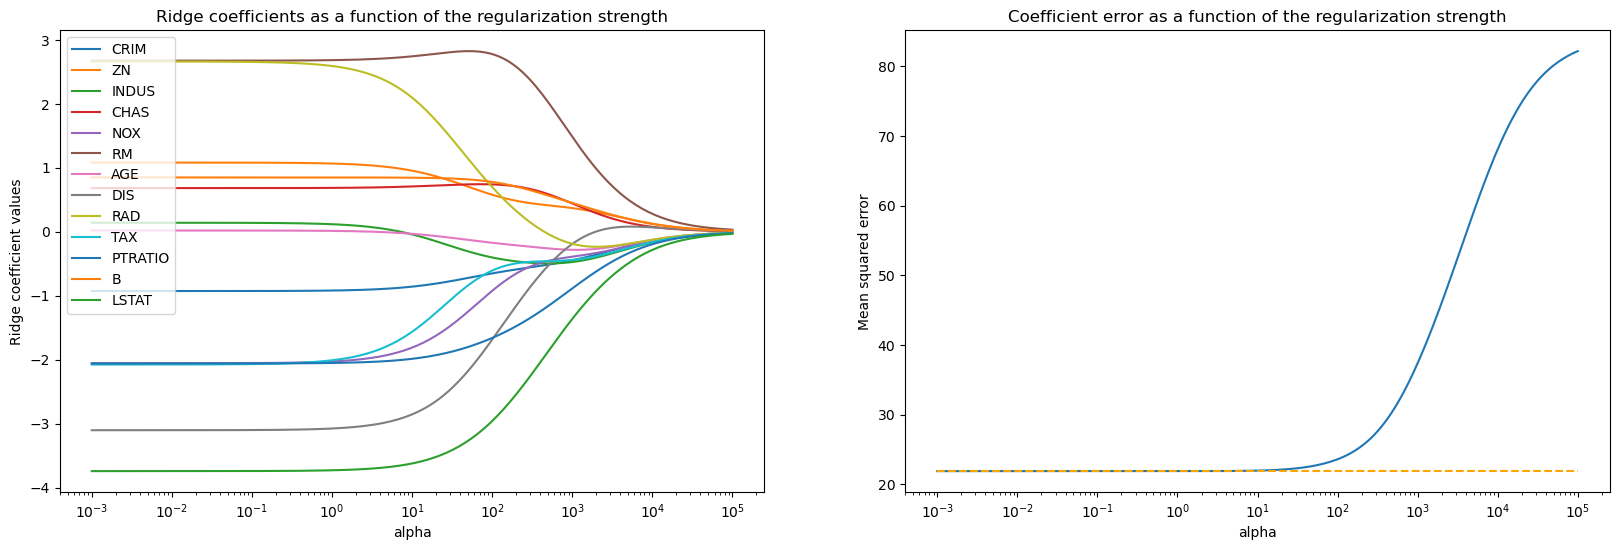

In [24]:
columns_name = df.drop(['MEDV'],axis=1).columns.to_list()
X = df.drop(['MEDV'],axis=1)
X = StandardScaler().fit_transform(X)
y = df['MEDV']

clf=Ridge()

alphas = np.logspace(-3, 5, 200)
coefs = []
errors_y = []

for a in alphas:
    clf.set_params(alpha=a).fit(X, y)
    y_pred = clf.predict(X)
    coefs.append(clf.coef_)
    errors_y.append(mean_squared_error(y, y_pred))

alphas = pd.Index(alphas, name="alpha")
coefs = pd.DataFrame(coefs, index=alphas, columns=columns_name)
errors = pd.Series(errors_y, index=alphas, name="Mean squared error")

fig, axs = plt.subplots(1, 2, figsize=(20, 6))

coefs.plot(
    ax=axs[0],
    logx=True,
    title="Ridge coefficients as a function of the regularization strength",
)
axs[0].set_ylabel("Ridge coefficient values")
errors.plot(
    ax=axs[1],
    logx=True,
    title="Coefficient error as a function of the regularization strength",
)
axs[1].hlines(mse_lr, xmin=np.min(alphas), xmax=np.max(alphas), linestyle='dashed', color='orange')
_ = axs[1].set_ylabel("Mean squared error")

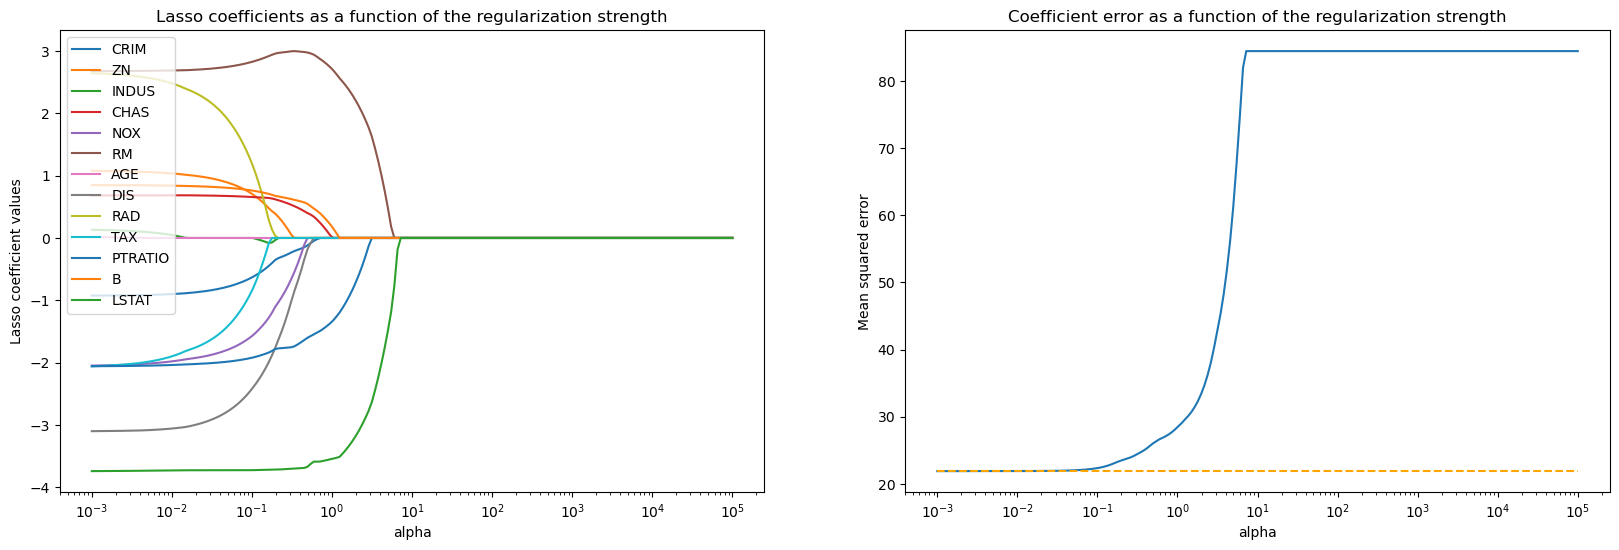

In [25]:
columns_name = df.drop(['MEDV'],axis=1).columns.to_list()
X = df.drop(['MEDV'],axis=1)
X = StandardScaler().fit_transform(X)
y = df['MEDV']

clf=Lasso()

alphas = np.logspace(-3, 5, 200)
coefs = []
errors_y = []

for a in alphas:
    clf.set_params(alpha=a).fit(X, y)
    y_pred = clf.predict(X)
    coefs.append(clf.coef_)
    errors_y.append(mean_squared_error(y, y_pred))

alphas = pd.Index(alphas, name="alpha")
coefs = pd.DataFrame(coefs, index=alphas, columns=columns_name)
errors = pd.Series(errors_y, index=alphas, name="Mean squared error")

fig, axs = plt.subplots(1, 2, figsize=(20, 6))

coefs.plot(
    ax=axs[0],
    logx=True,
    title="Lasso coefficients as a function of the regularization strength",
)
axs[0].set_ylabel("Lasso coefficient values")
errors.plot(
    ax=axs[1],
    logx=True,
    title="Coefficient error as a function of the regularization strength",
)
axs[1].hlines(mse_lr, xmin=np.min(alphas), xmax=np.max(alphas), linestyle='dashed', color='orange')
_ = axs[1].set_ylabel("Mean squared error")

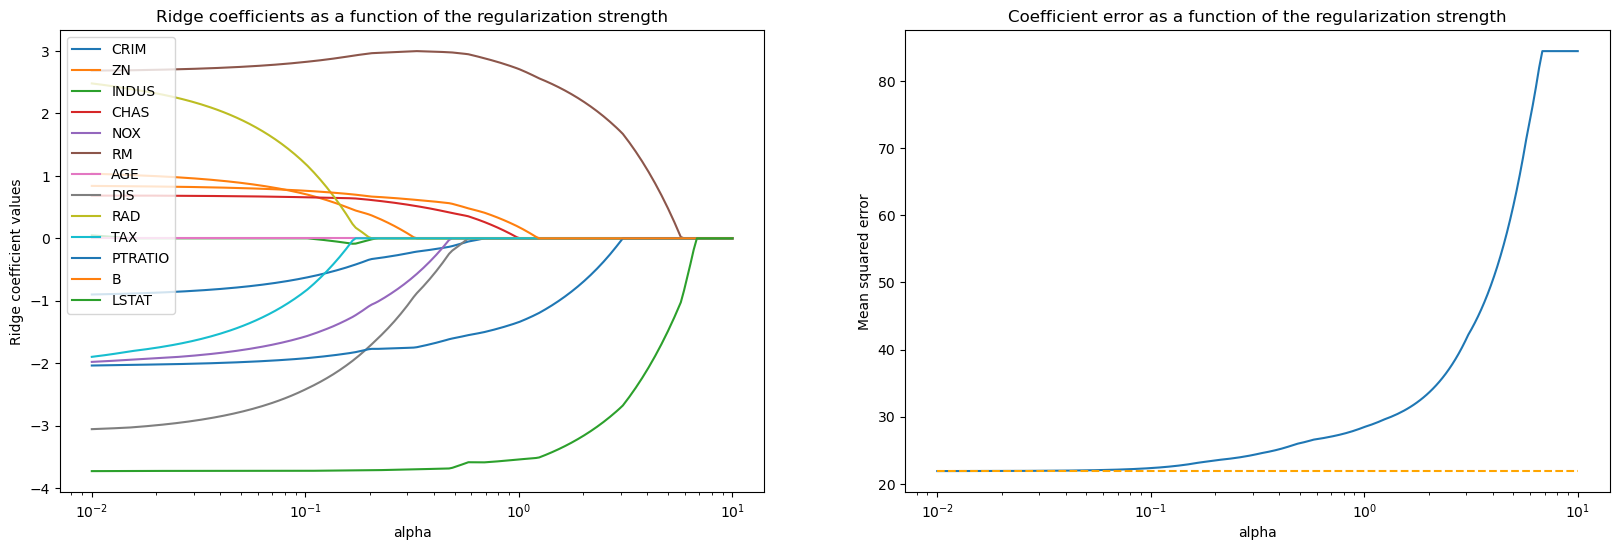

In [26]:
columns_name = df.drop(['MEDV'],axis=1).columns.to_list()
X = df.drop(['MEDV'],axis=1)
X = StandardScaler().fit_transform(X)
y = df['MEDV']

clf=Lasso()

alphas = np.logspace(-2, 1, 200)
coefs = []
errors_y = []

for a in alphas:
    clf.set_params(alpha=a).fit(X, y)
    y_pred = clf.predict(X)
    coefs.append(clf.coef_)
    errors_y.append(mean_squared_error(y, y_pred))

alphas = pd.Index(alphas, name="alpha")
coefs = pd.DataFrame(coefs, index=alphas, columns=columns_name)
errors = pd.Series(errors_y, index=alphas, name="Mean squared error")

fig, axs = plt.subplots(1, 2, figsize=(20, 6))

coefs.plot(
    ax=axs[0],
    logx=True,
    title="Ridge coefficients as a function of the regularization strength",
)
axs[0].set_ylabel("Ridge coefficient values")
errors.plot(
    ax=axs[1],
    logx=True,
    title="Coefficient error as a function of the regularization strength",
)
axs[1].hlines(mse_lr, xmin=np.min(alphas), xmax=np.max(alphas), linestyle='dashed', color='orange')
_ = axs[1].set_ylabel("Mean squared error")